In [27]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import matplotlib.pyplot as plt

Saving Womens Clothing E-Commerce Reviews.csv to Womens Clothing E-Commerce Reviews.csv


In [28]:
import io
df=pd.read_csv(io.BytesIO(uploaded['Womens Clothing E-Commerce Reviews.csv']))
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [29]:
# Check the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [30]:
# Drop the unnecessary column
df.drop(columns=["Unnamed: 0"], inplace=True)
print(df.shape)
# Display the updated dataframe
df.head()


(23486, 10)


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


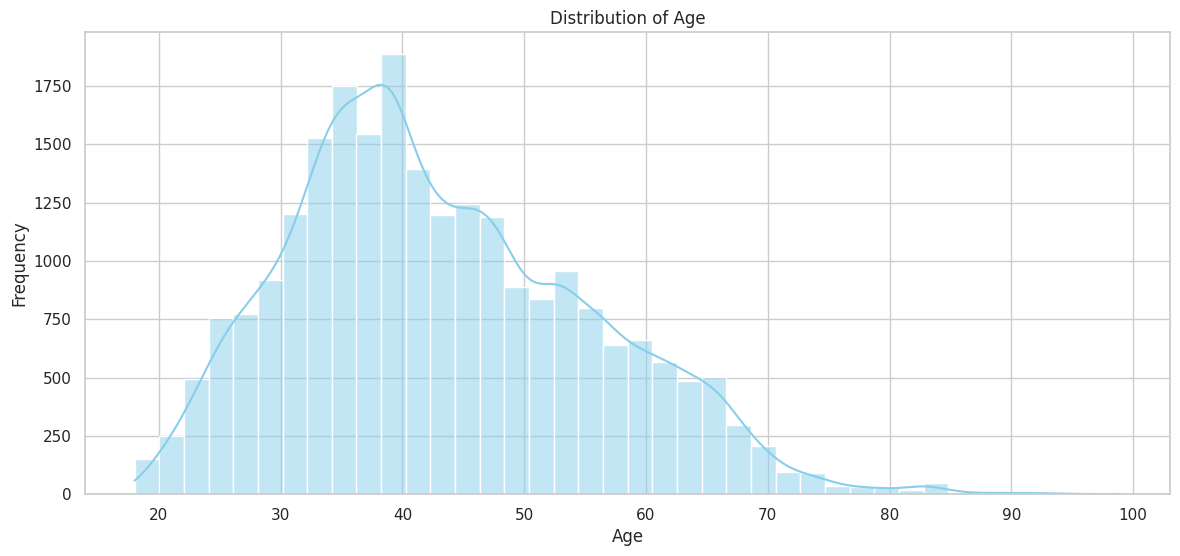

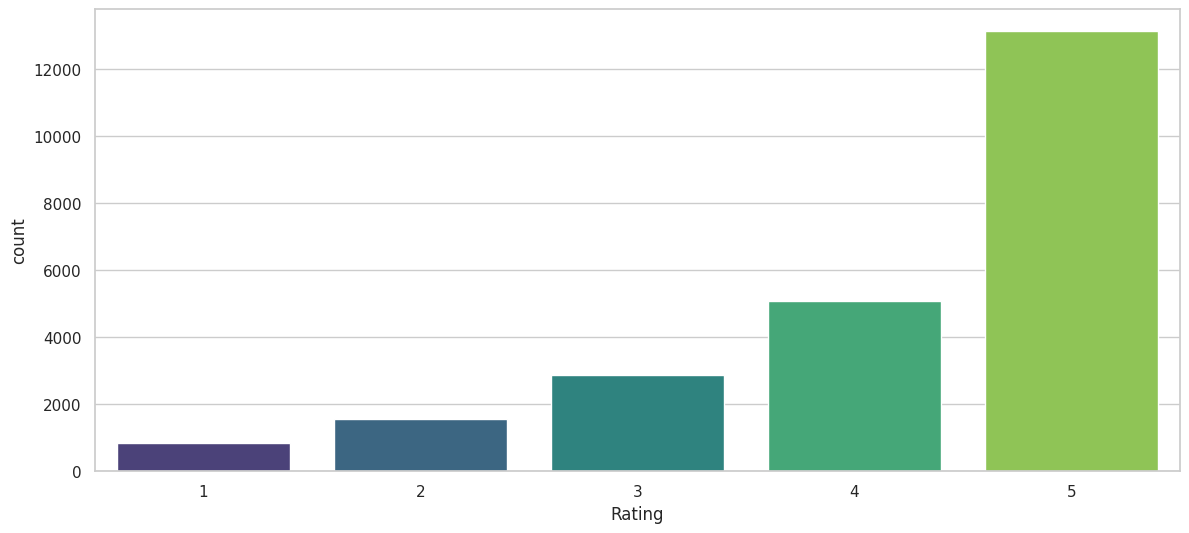

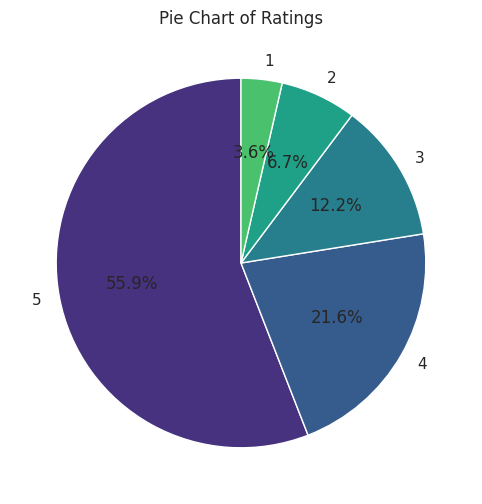

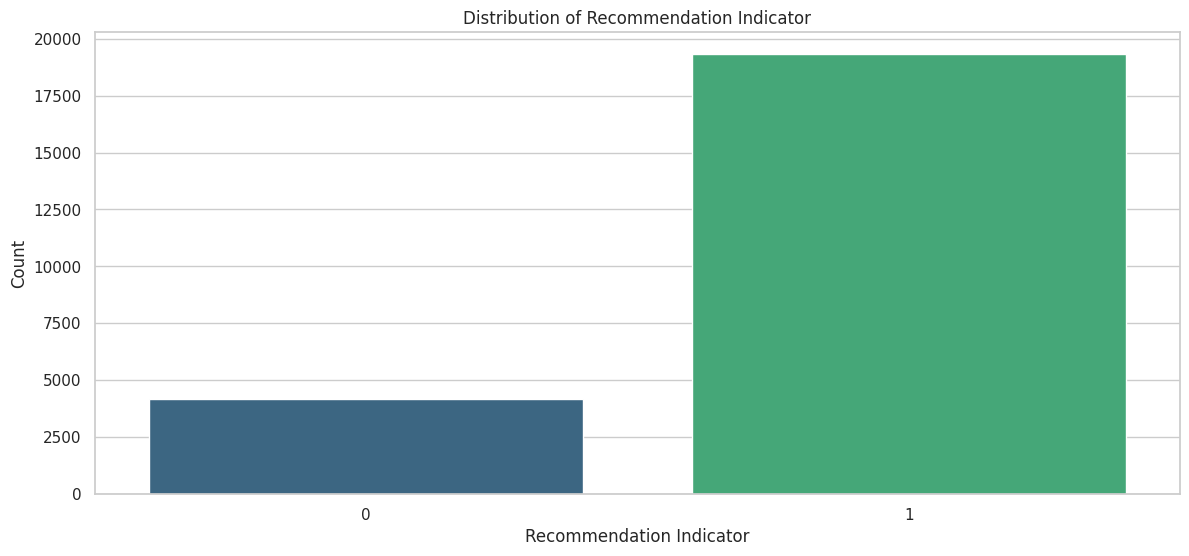

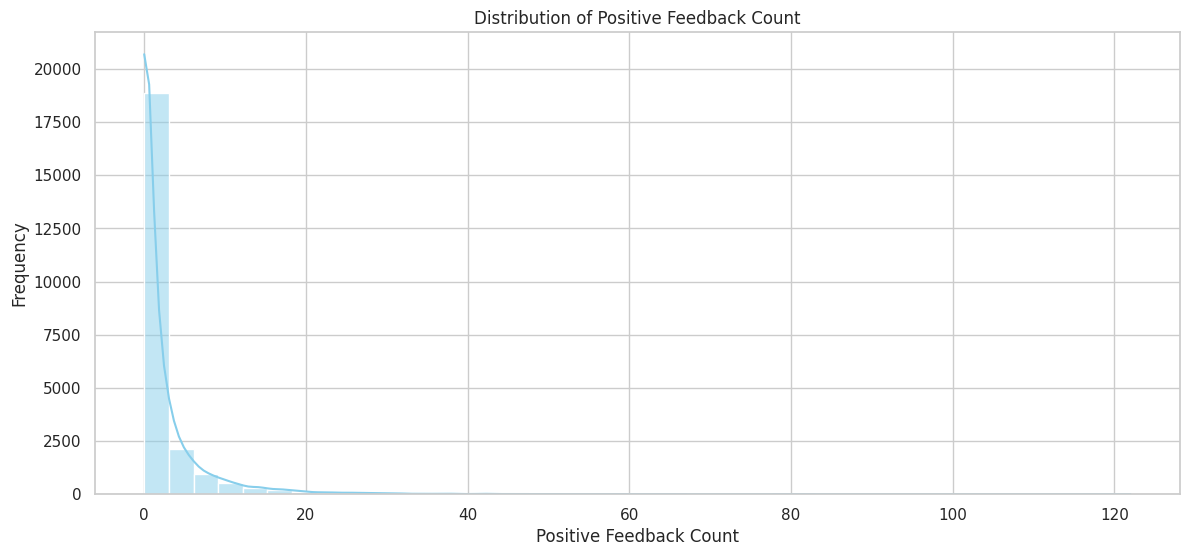

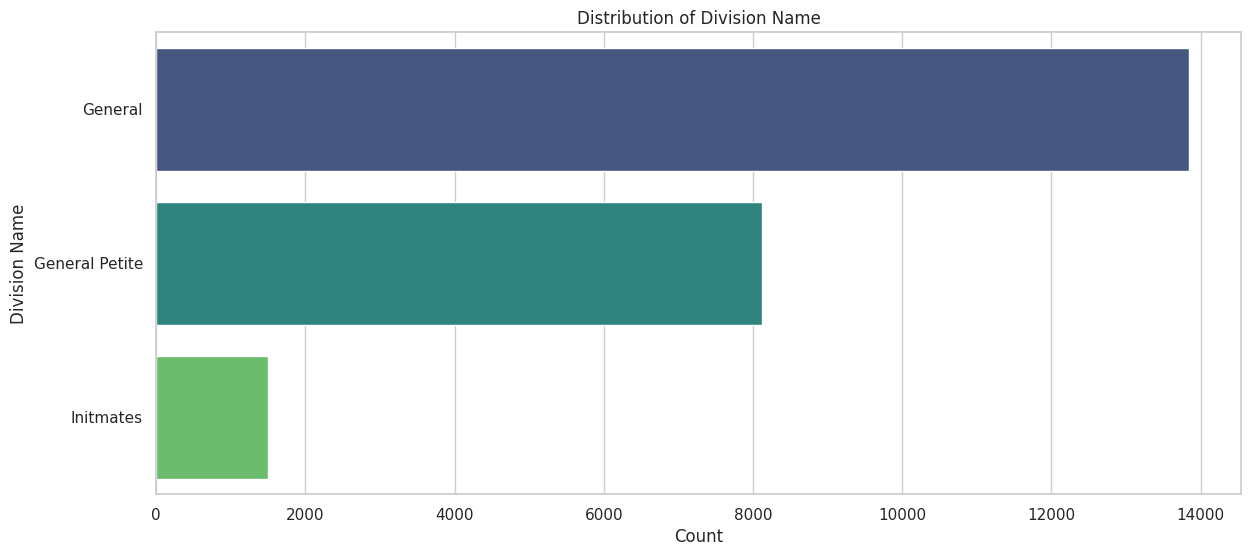

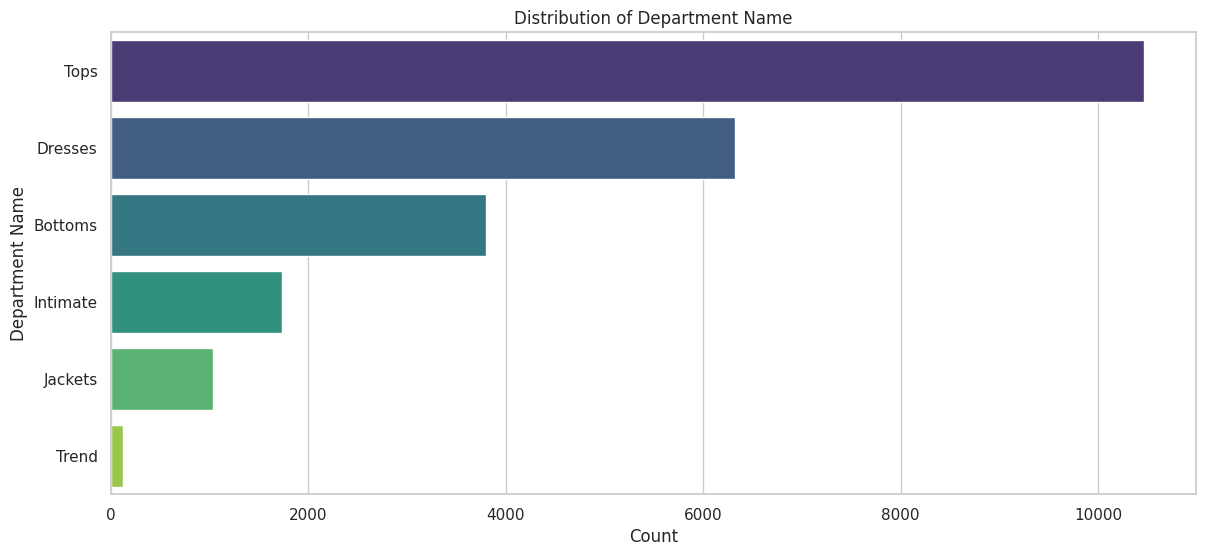

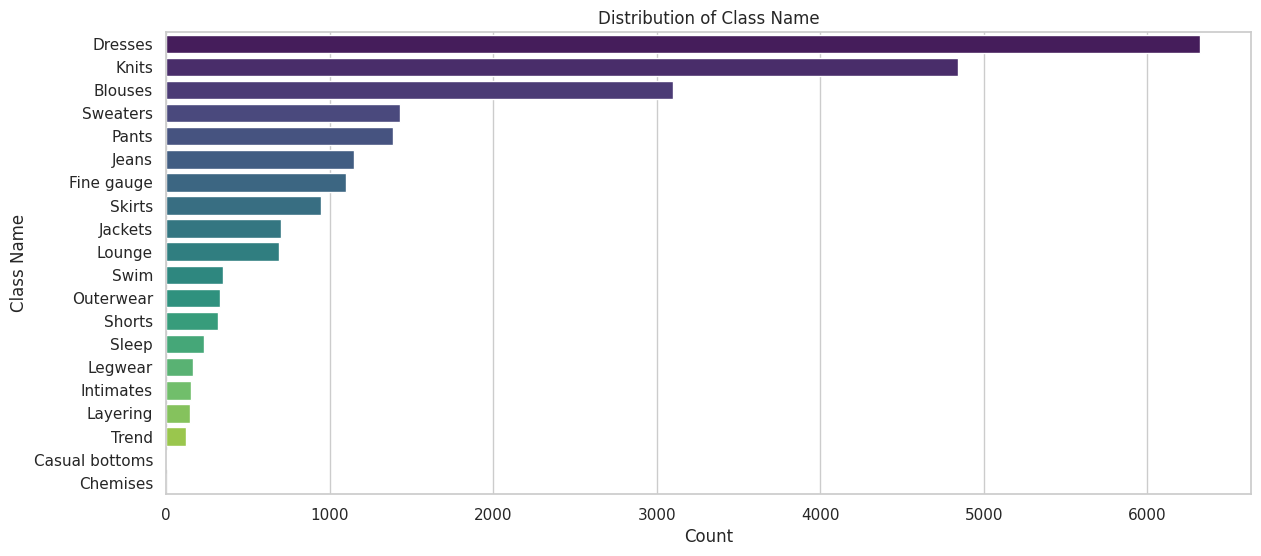

<ipython-input-31-18141f2ff02b>:65: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


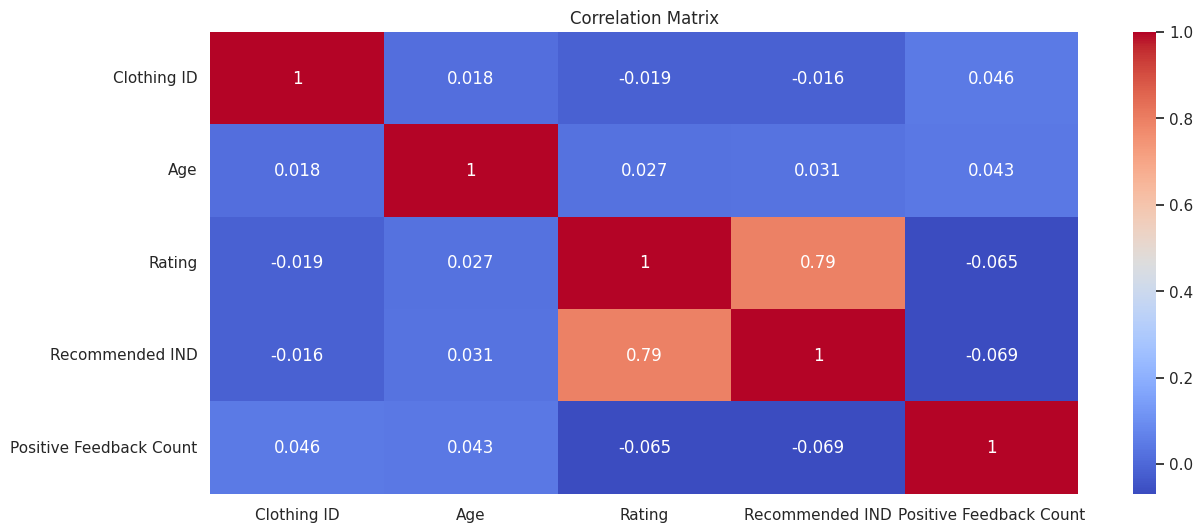

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of all graphs to seaborn style
sns.set(style="whitegrid")

# Plot distribution of age
plt.figure(figsize=(14,6))
sns.histplot(df['Age'], bins=40, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of ratings
rating_counts = df['Rating'].value_counts()
plt.figure(figsize=(14,6))
sns.countplot(x='Rating', data=df, palette='viridis')
plt.figure(figsize=(10,6))
plt.pie(rating_counts, labels=rating_counts.index, startangle=90, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Pie Chart of Ratings')
plt.show()

# Plot distribution of recommendation indicator
plt.figure(figsize=(14,6))
sns.countplot(x='Recommended IND', data=df, palette='viridis')
plt.title('Distribution of Recommendation Indicator')
plt.xlabel('Recommendation Indicator')
plt.ylabel('Count')
plt.show()

# Plot distribution of positive feedback count
plt.figure(figsize=(14,6))
sns.histplot(df['Positive Feedback Count'], bins=40, kde=True, color='skyblue')
plt.title('Distribution of Positive Feedback Count')
plt.xlabel('Positive Feedback Count')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of Division Name
plt.figure(figsize=(14,6))
sns.countplot(y='Division Name', data=df, palette='viridis', order=df['Division Name'].value_counts().index)
plt.title('Distribution of Division Name')
plt.xlabel('Count')
plt.ylabel('Division Name')
plt.show()

# Plot distribution of Department Name
plt.figure(figsize=(14,6))
sns.countplot(y='Department Name', data=df, palette='viridis', order=df['Department Name'].value_counts().index)
plt.title('Distribution of Department Name')
plt.xlabel('Count')
plt.ylabel('Department Name')
plt.show()

# Plot distribution of Class Name
plt.figure(figsize=(14,6))
sns.countplot(y='Class Name', data=df, palette='viridis', order=df['Class Name'].value_counts().index)
plt.title('Distribution of Class Name')
plt.xlabel('Count')
plt.ylabel('Class Name')
plt.show()

# Correlation matrix
corr = df.corr()
plt.figure(figsize=(14,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


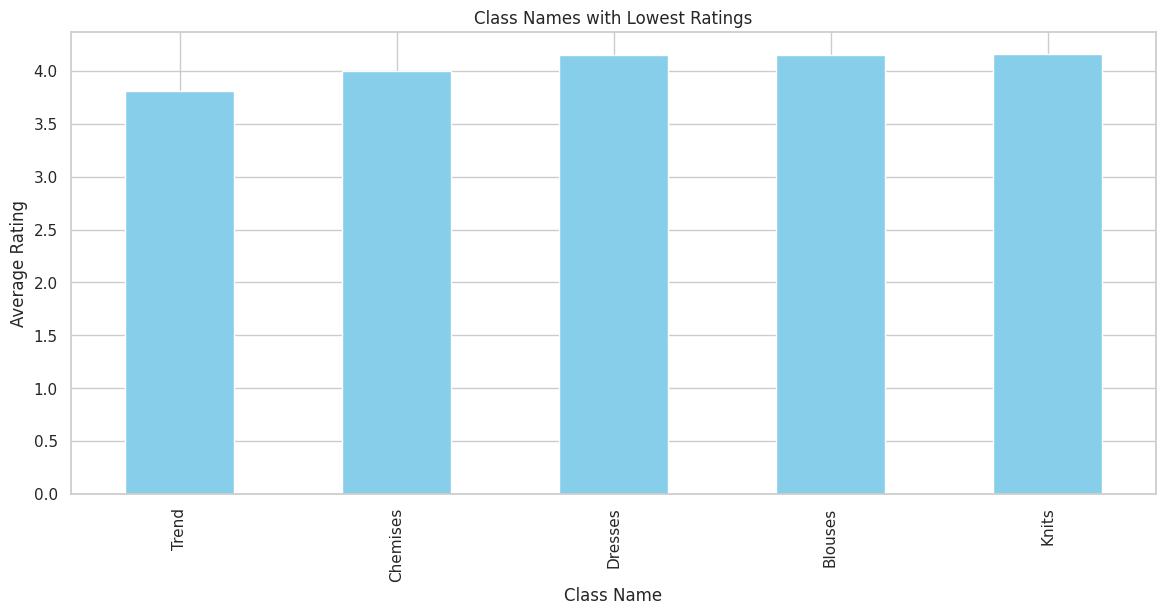

In [32]:
# Calculate average ratings by class
avg_rating_class = df.groupby('Class Name')['Rating'].mean().sort_values()

# Get the top 5 class names with the lowest average of ratings
top5_lowest_rating_classes = avg_rating_class[:5]

top5_lowest_rating_classes
# Plot average ratings by class for the top 5 classes with the lowest average ratings
plt.figure(figsize=(14,6))
top5_lowest_rating_classes.plot(kind='bar', color='skyblue')
plt.title('Class Names with Lowest Ratings')
plt.xlabel('Class Name')
plt.ylabel('Average Rating')
plt.show()

In [34]:
# Create a new DataFrame with reviews that have a rating below 3
low_rating_reviews = df[df['Rating'] < 3]
print(low_rating_reviews.shape)

#Removing Nan values from Review Text Column
low_rating_reviews = low_rating_reviews[low_rating_reviews['Review Text'].notna()]

print(low_rating_reviews.shape)

low_rating_reviews.head()

(2407, 10)
(2370, 10)


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
22,1077,31,Not what it looks like,"First of all, this is not pullover styling. th...",2,0,7,General,Dresses,Dresses
26,949,33,Huge disappointment,I have been waiting for this sweater coat to s...,2,0,0,General,Tops,Sweaters
33,949,36,Mehh,"I ordered this 3 months ago, and it finally ca...",2,0,0,General,Tops,Sweaters
56,368,33,NaN,I am pregnant and i thought this would be a gr...,2,0,3,Initmates,Intimate,Intimates


In [35]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tag import pos_tag
import string
import re
nltk.download('punkt')  # Download the punkt tokenizer data
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [46]:
def process_review(review):
    """Process review function.
    Input:
        review: a string containing a review
    Output:
        review_clean: a list of words containing the processed review

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    tokened_review=word_tokenize(review)
    to_remove=["n't","'s"]


    review_clean = []
    for word in tokened_review:
      word=word.lower()
      if (word not in stopwords_english and  # remove stopwords
              word not in string.punctuation and
              word not in to_remove
          ): # remove punctuation
          # tweets_clean.append(word)
          #stem_word = stemmer.stem(word)  # stemming word
          review_clean.append(word)

    return review_clean


def remove_verbs(tokens):
  """Remove verbs function.
  Input:
      token: The tokenized review
  Output:
      a list of words without any verbs
  """
  pos_tags = pos_tag(tokens)
  return [token for token, pos in pos_tags if pos not in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']]

In [47]:
#TOKENZATION
low_rating_reviews['Tokenized_Review'] = low_rating_reviews['Review Text'].apply(process_review)
low_rating_reviews['Tokenized_Review']
#REMOVING VERBS
low_rating_reviews['Verbs_removed'] = low_rating_reviews['Tokenized_Review'].apply(remove_verbs)
low_rating_reviews['Verbs_removed']


5        [tracy, reese, one, petite, 5, feet, tall, usu...
22       [first, pullover, side, zipper, would, side, z...
26       [sweater, coat, ship, weeks, arrive, coat, tru...
33       [3, months, ago, finally, back, order, huge, d...
56       [pregnant, thought, would, great, sleep, bra, ...
                               ...                        
23406    [fun, lightweight, white, dress, spring/summer...
23424    [noted, reviews, sheer, thought, would, layer,...
23427    [drew, shirt, beautiful, silver, gold, embroid...
23437    [dress, cute, photo, true, size, material, sli...
23478    [surprised, positive, reviews, product, terrib...
Name: Verbs_removed, Length: 2370, dtype: object

In [48]:
from nltk.probability import FreqDist

reviews_tokens = [token for review_tokens in low_rating_reviews['Verbs_removed'] for token in review_tokens]
reviews_freq_dist = FreqDist(reviews_tokens)

# Display the most common words and their frequencies in negative reviews
print(reviews_freq_dist.most_common(10))

[('dress', 1098), ('like', 1041), ('top', 805), ('would', 801), ('fabric', 691), ('size', 670), ('back', 607), ('fit', 556), ('small', 502), ('really', 474)]


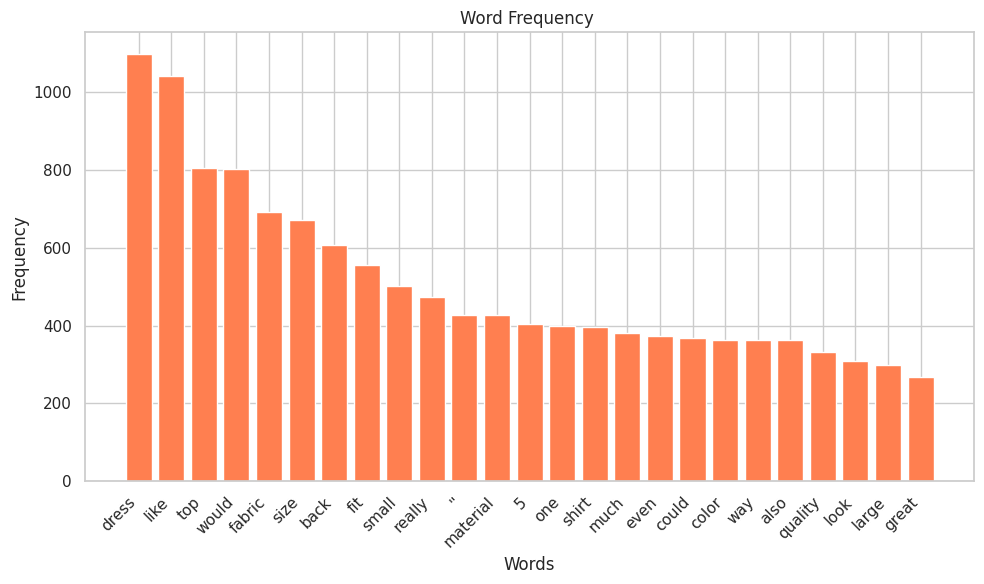

In [49]:
most_common_words, frequencies = zip(*reviews_freq_dist.most_common(25))
plt.figure(figsize=(10, 6))
plt.bar(most_common_words, frequencies, color='coral')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency ')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()